# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [93]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
import statsmodels.api as sm

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [9]:
# Your code here. 
x_values = [17,51,27,21,36,48,19,26,54,30]
y_values = [10,1,5,9,4,2,9,6,0,3]
student_data = pd.DataFrame({'X': x_values, 'Y': y_values})

Draw a dispersion diagram (scatter plot) for the data.

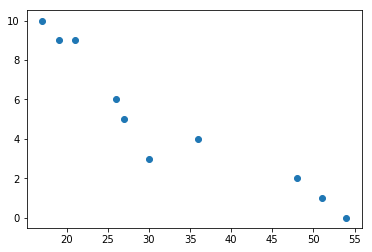

In [12]:
# Your code here.
plt.scatter(student_data['X'], student_data['Y'])
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

**COMMENT:**<br>
    I can see a negative linear correlation betwee tardies and age. <br>
    The older is the person, the less number of tardies. 


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [15]:
#Covariance
cov = student_data.cov()
print(cov)

            X          Y
X  187.655556 -45.566667
Y  -45.566667  12.544444


In [14]:
# Your response here.
#Correlation
corr = student_data.corr()
print(corr)

          X         Y
X  1.000000 -0.939163
Y -0.939163  1.000000


**COMMENT:**<br>
**Covariance**: direction of the linear relationship between two variables. <br>
**Correlation**:measures both the strength and direction of the linear relationship between two variables.<br>
Correlation is a function of the covariance. The correlation values are standardized whereas, covariance values are not. <br>
**In this case** those values tell us that there is a strong negative linear relationship betwwen vars.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [65]:
# Your response here.
slope, intercept, r_value, p_value, std_err = stats.linregress(student_data['X'], student_data['Y'])

print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: -0.2428207709159808
The intercept is: 12.888803363135768


Plot your regression model on your scatter plot.

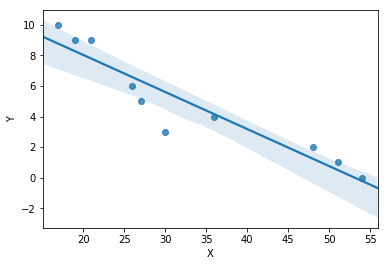

In [20]:
# Your code here.
sns.regplot(x = 'X', y = 'Y', data=student_data)
plt.show()

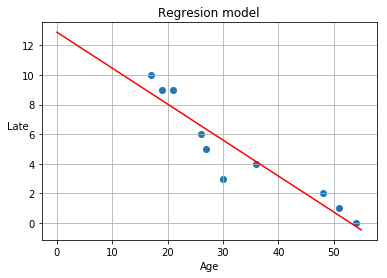

In [58]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(0,55,100)
y = slope*x+intercept
plt.plot(x, y, '-r')
plt.scatter(student_data['X'], student_data['Y'])
plt.title('Regresion model')
plt.xlabel('Age')
plt.ylabel('Late', rotation=0)
plt.grid()
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [71]:
# Your response here. 
print (f'The slope is:{round(slope,4)}')
print (f'The intercept is: ' + str(intercept))
print('The Age and Tardiness are very negative related. The younger, the tardinest')
print (f'The r value is::{round(r_value,4)}')
print (f'The p value is:{p_value}')
print (f'The stdandard error is:{round(std_err,4)}')
print('The p value is quite small, so we can reject that the tardiness do not deppend on the age.')
print('The age is a good predictor for the tardiness')

The slope is:-0.2428
The intercept is: 12.888803363135768
The Age and Tardiness are very negative related. The younger, the tardinest
The r value is::-0.9392
The p value is:5.56665383455343e-05
The stdandard error is:0.0314
The p value is quite small, so we can reject that the tardiness do not deppend on the age.
The age is a good predictor for the tardiness


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [74]:
# Import any libraries you may need & the data
data = pd.read_csv("vehicles.csv")
data.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [85]:
# Your response here. 
data_sel = data[['CO2 Emission Grams/Mile','Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
corr = data_sel.corr()
print(corr['CO2 Emission Grams/Mile'].sort_values(ascending=False))
print('The most important variable in determining the CO2 is "Fuel Barrels/Year"')
print('The variable that provide the less info in determining the CO2 is "Year"')

CO2 Emission Grams/Mile    1.000000
Fuel Barrels/Year          0.986189
Fuel Cost/Year             0.930865
Cylinders                  0.752393
Year                      -0.222300
Combined MPG              -0.926229
Name: CO2 Emission Grams/Mile, dtype: float64
The most important variable in determining the CO2 is "Fuel Barrels/Year"
The variable that provide the less info in determining the CO2 is "Year"


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [95]:
# Your response here. 

Y = data_sel.iloc[:,0:1]
Xm = data_sel.iloc[:,1:]
model = sm.OLS(Y,Xm) #OLS Multi Regresion Model
results = model.fit()
predictions = results.predict(Xm)


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [97]:
# Your response here. 
print(results.summary())
#The most important variables are 'Fuel Barrels/Year' and 'Combined MPG'
#We can be confident of the conclusions as the ocefficient in big and the R-squared very close to 1.

                                   OLS Regression Results                                   
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          6.092e+06
Date:                     Mon, 09 Sep 2019   Prob (F-statistic):                        0.00
Time:                             14:09:52   Log-Likelihood:                     -1.5250e+05
No. Observations:                    35952   AIC:                                  3.050e+05
Df Residuals:                        35947   BIC:                                  3.050e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
                        coef    std err          t      P>|t|      [0.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [110]:
# Your code here. 
X = [1,3,4,6,8,9,11,14]
Y = [1,2,4,4,5,7,8,13]
parties_data = pd.DataFrame({'X': X, 'Y': Y})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

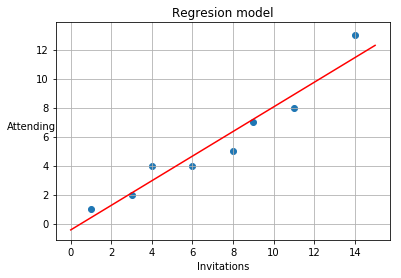

In [111]:
# Your code here.
slope, intercept, r_value, p_value, std_err = stats.linregress(parties_data['X'], parties_data['Y'])

fig, ax = plt.subplots(1, 1)
x = np.linspace(0,15,100)
y = slope*x+intercept
plt.plot(x, y, '-r')
plt.scatter(parties_data['X'], parties_data['Y'])
plt.title('Regresion model')
plt.xlabel('Invitations')
plt.ylabel('Attending', rotation=0)
plt.grid()
plt.show()



What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [112]:
# Your response here. 
print (f'The slope is:{round(slope,4)}')
print (f'The intercept is: ' + str(intercept))
print('The Invitations and the Attendance are very positive linear correlated.')
print (f'The r value is::{round(r_value,4)}')
print (f'The p value is:{p_value}')
print (f'The stdandard error is:{round(std_err,4)}')
print('The p value is quite small, so we can reject that the atendance do not deppend on the invitations.')
print('The invitations is a good predictor for the atendance')

The slope is:0.8485
The intercept is: -0.43939393939393945
The Invitations and the Attendance are very positive linear correlated.
The r value is::0.9652
The p value is:0.00010236374464090686
The stdandard error is:0.0938
The p value is quite small, so we can reject that the atendance do not deppend on the invitations.
The invitations is a good predictor for the atendance


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

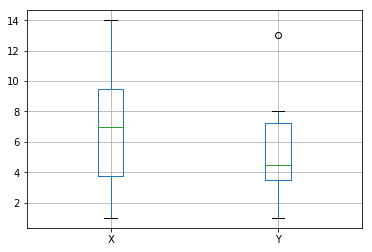

I will remove the y=13 as it is an outlier


In [116]:
parties_data.boxplot()
plt.show()
print(f'I will remove the y=13 as it is an outlier')

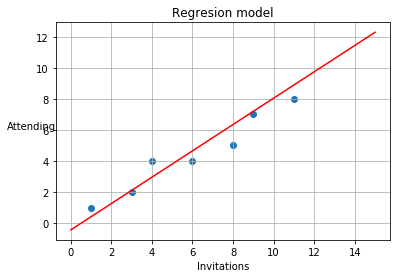

The slope is:0.6842
The intercept is: 0.32330827067669166
The Invitations and the Attendance are very positive linear correlated.
The r value is:0.9713
The p value is:0.0002644056885656864
The stdandard error is:0.075
The p value is quite small, so we can still reject that the atendance do not deppend on the invitations.
The invitations is a good predictor for the atendance


In [117]:
# Your response here. 
X2 = [1,3,4,6,8,9,11]
Y2 = [1,2,4,4,5,7,8]
parties_data2 = pd.DataFrame({'X': X2, 'Y': Y2})
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(parties_data2['X'], parties_data2['Y'])

fig, ax = plt.subplots(1, 1)
x = np.linspace(0,15,100)
y = slope*x+intercept
plt.plot(x, y, '-r')
plt.scatter(parties_data2['X'], parties_data2['Y'])
plt.title('Regresion model')
plt.xlabel('Invitations')
plt.ylabel('Attending', rotation=0)
plt.grid()
plt.show()
print (f'The slope is:{round(slope2,4)}')
print (f'The intercept is: ' + str(intercept2))
print('The Invitations and the Attendance are very positive linear correlated.')
print (f'The r value is:{round(r_value2,4)}')
print (f'The p value is:{p_value2}')
print (f'The stdandard error is:{round(std_err2,4)}')
print('The p value is quite small, so we can still reject that the atendance do not deppend on the invitations.')
print('The invitations is a good predictor for the atendance')

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [119]:
# Your response here. 
compared_data = pd.DataFrame({'slope': [slope,slope2], 'intercept': [intercept, intercept2],
                              'r value': [r_value,r_value2], 'p value': [p_value,p_value2] ,
                              'stdandard error': [std_err,std_err2]})

In [121]:
compared_data

,slope,intercept,r value,p value,stdandard error
0,0.848485,-0.439394,0.965230,0.000102,0.093809
1,0.684211,0.323308,0.971278,0.000264,0.074962


**COMMENT:**<br>
    On the seccond model there is a stronger correlation between invitations and attendance
    